# Implement k-means++ algorithm (For 2D data)

## Import library

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Generate sample data (to check algorithm correctly)

### Generate circule dataset

No handles with labels found to put in legend.


(32, 2)


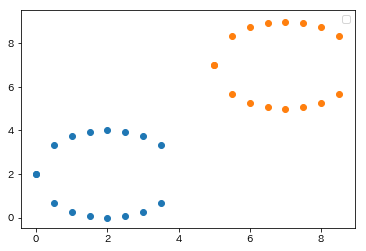

In [4]:
x_1 = np.arange(0, 4, 0.5)
x_2 = np.arange(5, 9, 0.5)

y_1_top = 2 + (4 - (x_1 - 2) ** 2) ** 0.5
y_2_top = 7 + (4 - (x_2 - 7) ** 2) ** 0.5

y_1_bottom = 2 - (4 - (x_1 - 2) ** 2) ** 0.5
y_2_bottom = 7 - (4 - (x_2 - 7) ** 2) ** 0.5

x_1_data = np.concatenate([x_1, x_1])
x_2_data = np.concatenate([x_2, x_2])

y_1_data = np.concatenate([y_1_top, y_1_bottom])
y_2_data = np.concatenate([y_2_top, y_2_bottom])

plt.figure()
plt.scatter(x_1_data, y_1_data)
plt.scatter(x_2_data, y_2_data)
plt.legend()

x_all = np.concatenate([x_1_data, x_2_data])
y_all = np.concatenate([y_1_data, y_2_data])

circule_data = np.vstack([[x_all], [y_all]]).T
print(circule_data.shape)

### Genarate rectangle dataset

No handles with labels found to put in legend.


(72, 2)


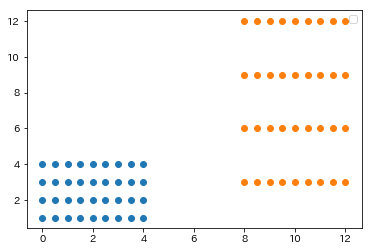

In [5]:
rectangle_x_1_base = np.arange(0, 4.5, 0.5)
rectangle_x_1 = np.concatenate([rectangle_x_1_base for _ in range(1, 5)])
rectangle_y_1_base = np.ones(rectangle_x_1_base.shape[0])
rectangle_y_1 = np.concatenate([rectangle_y_1_base *scale for scale in range(1, 5)])

rectangle_x_2_base = np.arange(8, 12.5, 0.5)
rectangle_x_2 = np.concatenate([rectangle_x_2_base for _ in range(1, 5)])
rectangle_y_2_base = np.ones(rectangle_x_2_base.shape[0]) * 3
rectangle_y_2 = np.concatenate([rectangle_y_2_base *scale for scale in range(1, 5)])

plt.figure()
plt.scatter(rectangle_x_1, rectangle_y_1)
plt.scatter(rectangle_x_2, rectangle_y_2)
plt.legend()

rectangle_x_all = np.concatenate([rectangle_x_1, rectangle_x_2])
rectangle_y_all = np.concatenate([rectangle_y_1, rectangle_y_2])
rectangle_data = np.vstack([[rectangle_x_all], [rectangle_y_all]]).T
print(rectangle_data.shape)

### Generate iris dataset

['Setosa' 'Versicolor' 'Virginica']
Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')


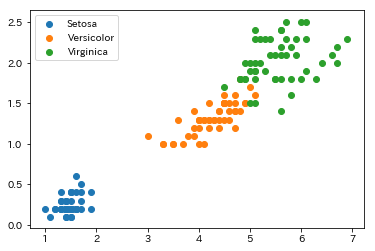

In [6]:
from sklearn.datasets import load_iris
iris_df = pd.read_csv(filepath_or_buffer="iris.csv", encoding="ms932", sep=",")
print(iris_df["variety"].unique())
print(iris_df.columns)
plt.scatter(iris_df[iris_df["variety"] == "Setosa"]["petal.length"], iris_df[iris_df["variety"] == "Setosa"]["petal.width"], label="Setosa")
plt.scatter(iris_df[iris_df["variety"] == "Versicolor"]["petal.length"], iris_df[iris_df["variety"] == "Versicolor"]["petal.width"], label="Versicolor")
plt.scatter(iris_df[iris_df["variety"] == "Virginica"]["petal.length"], iris_df[iris_df["variety"] == "Virginica"]["petal.width"], label="Virginica")
plt.legend()

iris_data = iris_df.loc[:,['petal.length','petal.width']].values

## Define k-means class

In [144]:
class KmeansPlus:
    
    #     initialization of kmeans class
    def __init__(self, cluster_num, iter_num):
        
        #         define cluster numbers
        self.cluster_num = cluster_num

        #         define iteration numbers
        self.iter_num = iter_num
        
        #         define color map to plot data (if cluster numbers > color number, we can use same color)
        self.color_map = ["r", "g", "b", "c", "m", "y", "k", "w"]
        


    #     initialize coordinate of each centroid
    def init_centroid(self):

        #         define initial centroid data 
        self.centroid_coord = {}
        
        #         save history of centroid index
        self.choose_centroid_history = np.ones(self.sample_num)
        
        #         search initial centoid coordinate
        while (len(self.centroid_coord.keys()) < self.cluster_num):

            #             if fisrt initialization 
            if len(self.centroid_coord.keys()) == 0:
                
                #                 choice random sample and set centroid coordinate
                selected_sample_idx = np.random.randint(0, self.sample_num)
                self.centroid_coord[str(len(self.centroid_coord.keys()))] = np.array([self.sample_data[selected_sample_idx, 0],
                                                                          self.sample_data[selected_sample_idx, 1]]) 
                
                #                 save choose sample index
                self.choose_centroid_history[selected_sample_idx] = 0
                
            else:
                
                #                 calculate probablity of next sample data for centroid
                distance_array = np.zeros((len(self.centroid_coord), self.sample_num))
                for centroid_idx, centroid_coord in self.centroid_coord.items():
                    distance_array[int(centroid_idx), :] = np.sum((self.sample_data - centroid_coord) ** 2, axis=1)
                
#                 rewrite used sample probablity to 0
                distance_sum_ver = np.sum(distance_array, axis=0) * self.choose_centroid_history
                disntance_prob = distance_sum_ver / np.sum(distance_sum_ver) 
                
                #                 choice sample data from probability generated by euclid distances
                selected_sample_idx = np.random.choice([i for i in range(0, self.sample_num)], p=disntance_prob)
                self.centroid_coord[str(len(self.centroid_coord.keys()))] = np.array([self.sample_data[selected_sample_idx, 0],
                                                                          self.sample_data[selected_sample_idx, 1]]) 
        
                #                 save choose sample index
                self.choose_centroid_history[selected_sample_idx] = 0
                
    #     training input data
    def fit(self, sample_data):
        
        #         set input data
        self.sample_data = sample_data
        self.sample_num = sample_data.shape[0]
        self.sample_features = sample_data.shape[1]
        
        #         init each centroid
        self.init_centroid()
        self.before_centroid = self.centroid_coord
        
        #         iteration training
        for _ in range(iter_num):
            self.iteration_block()
            self.visualize_data()
    
    #     return result labels of clustering
    def predict(self):
        return np.argmin(self.distance_from_centroid, axis=1).reshape(1, -1)
    
    #     exe k-means main algorithm
    def iteration_block(self):
        
        #         split data to each centroid
        self.distance_from_centroid = np.zeros((self.sample_num, self.cluster_num))
        for centroid_idx in self.centroid_coord.keys():
            self.distance_from_centroid[:, int(centroid_idx)] = np.sum(np.abs(self.sample_data - self.centroid_coord[centroid_idx])**2,axis=-1)**(1./2)

        #         updata each coordinate of centroid
        sample_data_concat = np.concatenate([self.sample_data, np.argmin(self.distance_from_centroid, axis=1).reshape(-1, 1)], axis=1)
        for centroid_idx in self.centroid_coord.keys():
            self.centroid_coord[centroid_idx] = np.mean(sample_data_concat[sample_data_concat[:, -1] == int(centroid_idx)][:, :-1], axis=0)

    #     visualize clustering result of each iteration
    def visualize_data(self):
        sample_data_concat = np.concatenate([self.sample_data, np.argmin(self.distance_from_centroid, axis=1).reshape(-1, 1)], axis=1)

        #         plot sample data and centroids
        plt.figure()
    
        for centroid_idx in self.centroid_coord.keys():
            #             plot sample data
            plt.scatter(sample_data_concat[sample_data_concat[:, -1] == int(centroid_idx)][:, 0],
                        sample_data_concat[sample_data_concat[:, -1] == int(centroid_idx)][:, 1], 
                        color=self.color_map[int(centroid_idx) % 10], alpha=0.2)
            
            #             plot centroids data
            plt.scatter(self.centroid_coord[centroid_idx][0], self.centroid_coord[centroid_idx][-1],
                        label="cluster {}".format(centroid_idx), marker="x", color=self.color_map[int(centroid_idx) % 10], 
                        linewidths=5, s=100)
        
        plt.legend()
        plt.show()

## Execute k-means algorithm using datasets which you want to test  
(Circle, Rectangle, Iris)

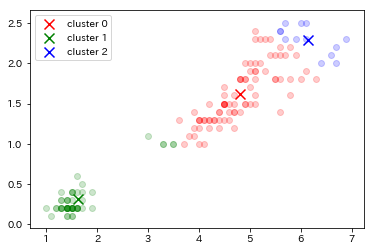

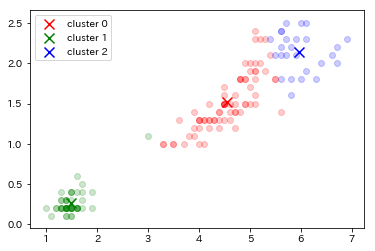

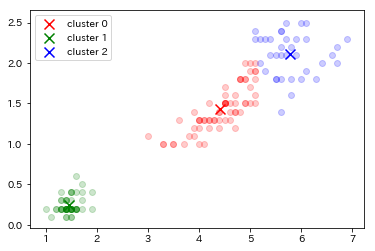

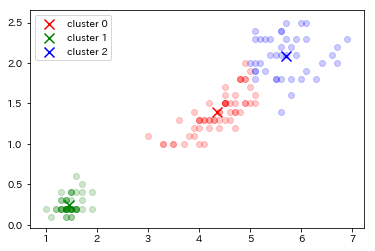

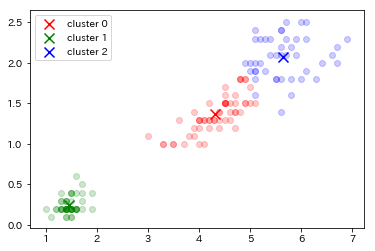

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
        2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]],
      dtype=int64)

In [148]:
# set some parameters
cluster_num = 3
iter_num = 5
sample_data = iris_data

# make instance of KmeansPlus class
kmeans_plus = KmeansPlus(cluster_num, iter_num)

# train dataset
kmeans_plus.fit(sample_data)

# get result of clustering
kmeans_plus.predict()